In [66]:
! pip install -q wordcloud

In [67]:
# Import python packages
import os
import re
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

In [68]:
# Read business data and checkin data
final_dataset = pd.read_csv('final_dataset.csv')

In [69]:
# Make a copy of raw dataset
df = final_dataset.copy()

In [70]:
# Check dimensions
df.shape

(2493, 32)

In [71]:
# Reveal first few rows 
df.head()

business_id     city   latitude   longitude  \
0  rDMptJYWtnMhpQu_rRXHng  Phoenix  33.607070 -112.064382   
1  1WBkAuQg81kokZIPMpn9Zg  Phoenix  33.607310 -112.063404   
2  iPa__LOhse-hobC2Xmp-Kw  Phoenix  33.508765 -112.046240   
3  YhV93k9uiMdr3FlV4FHjwA  Phoenix  33.449967 -112.070223   
4  QkG3KUXwqZBW18A9k1xqCA  Phoenix  33.478735 -112.221379   

                           name  postal_code  review_count  star_rating state  \
0                    McDonald's        85022            10          1.0    AZ   
1  Charr An American Burger Bar        85022           232          3.0    AZ   
2                    McDonald's        85016            34          3.0    AZ   
3               Caviness Studio        85001             4          5.0    AZ   
4                   Red Lobster        85035            37          2.5    AZ   

   isBankrupt                        ...                          \
0           0                        ...                           
1           0                        ...                           
2           0                        ...                           
3           0                        ...                           
4           0                        ...                           

  Coffee_Pastry_PortionSize  Price_Service  Asian_Food_Description  \
0                  0.090909            0.0                     0.0   
1                  0.000000            0.0                     0.0   
2                  0.000000            0.0                     0.0   
3                  0.000000            0.0                     0.0   
4                  0.000000            0.0                     0.0   

   Gluten_Free_Food  Mexican_Food_Description  Fast_Food_Description  \
0               0.0                  0.000000               0.090909   
1               0.0                  0.012931               0.137931   
2               0.0                  0.058824               0.029412   
3               0.0                  0.000000               0.000000   
4               0.0                  0.000000               0.000000   

   polarity  subjectivity  restaurant_age  \
0 -0.161032      0.494729        6.575342   
1  0.243730      0.626364        5.526027   
2  0.037716      0.568482        9.641096   
3  0.391310      0.685331        1.501370   
4  0.099518      0.652154        5.715068   

                                          clean_text  
0  speed delivery food order terrible take minute...  
1  place way successful run good customer service...  
2  awesome breakfast good store clean clean porti...  
3  custom shirt order design silk screen print te...  
4  food good service great waiter think attentive...  

[5 rows x 32 columns]

## Wordcloud

In [74]:
text = ' '.join(str(review) for review in df['clean_text'].head(100))

(-0.5, 636.5, 636.5, -0.5)

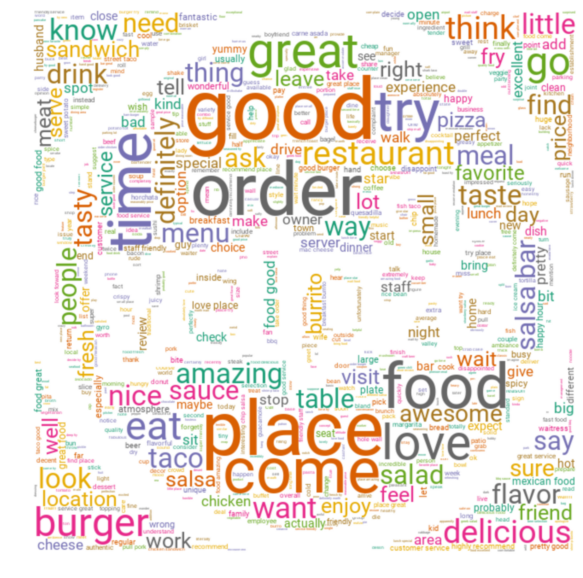

In [78]:
mask = np.array(Image.open('yelp-icon.png'))

wc = WordCloud(font_path='Roboto-Regular.ttf',
               max_font_size=100, 
               background_color='white', 
               mask=mask, 
               max_words=5000, 
               colormap='Dark2',
               random_state=314)

wc.generate(text)

wc.to_file('yelp_word_cloud.png')

plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation='bicubic')
plt.axis('off')

(-0.5, 636.5, 636.5, -0.5)

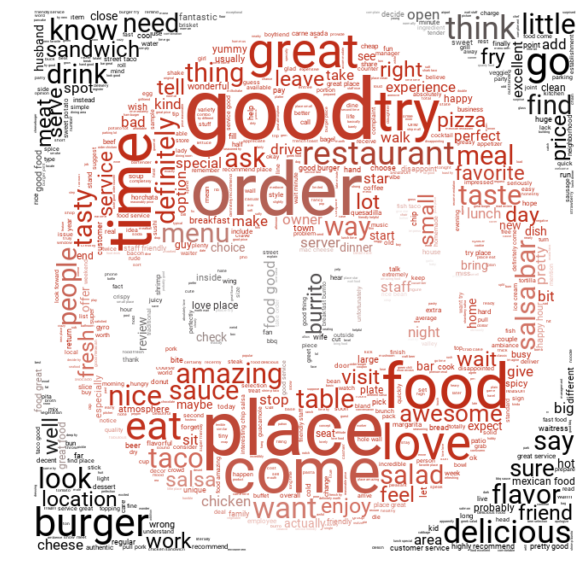

In [79]:
wc = WordCloud(font_path='Roboto-Regular.ttf',
               max_font_size=100, 
               background_color='white', 
               mask=mask, 
               max_words=2000, 
               colormap='Dark2', 
               random_state=314)

wc.generate(text)

wc.to_file('yelp_word_cloud.png')

image_colors = ImageColorGenerator(mask)

plt.figure(figsize=(20,10))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')

## Preprocess before other EDA

In [80]:
# Drop unnecessary variables
var_to_drop = ['business_id', 'city', 'latitude', 'longitude', 'name', 'postal_code', 'state', 'county', 'clean_text']
df = df.drop(var_to_drop, axis=1)

In [81]:
# Check dimensions
df.shape

(2493, 23)

In [82]:
df.describe().T

count        mean         std        min  \
review_count               2493.0  113.270758  188.476268   3.000000   
star_rating                2493.0    3.424789    0.867333   1.000000   
isBankrupt                 2493.0    0.061372    0.240059   0.000000   
isChain                    2493.0    0.410349    0.491996   0.000000   
neighborhood               2493.0   14.208985   10.263388   1.000000   
cool                       2493.0    0.533981    0.586501   0.000000   
funny                      2493.0    0.483094    0.544059   0.000000   
stars                      2493.0    3.422489    0.853534   1.000000   
useful                     2493.0    1.047033    0.784494   0.000000   
review_length              2493.0   94.495912   28.130013  28.000000   
Service_Quality            2493.0    0.055934    0.061295   0.000000   
Breakfast_Description      2493.0    0.003288    0.012828   0.000000   
Order_Wait_Time            2493.0    0.232456    0.192690   0.000000   
Dining_Experience          2493.0    0.535288    0.186753   0.000000   
Coffee_Pastry_PortionSize  2493.0    0.004469    0.025876   0.000000   
Price_Service              2493.0    0.000510    0.004370   0.000000   
Asian_Food_Description     2493.0    0.016482    0.046103   0.000000   
Gluten_Free_Food           2493.0    0.001231    0.009464   0.000000   
Mexican_Food_Description   2493.0    0.076283    0.137768   0.000000   
Fast_Food_Description      2493.0    0.074058    0.093648   0.000000   
polarity                   2493.0    0.213020    0.132149  -0.303299   
subjectivity               2493.0    0.606941    0.046427   0.223750   
restaurant_age             2493.0    6.052926    3.343613   0.076712   

                                 25%        50%         75%          max  
review_count               13.000000  43.000000  134.000000  2035.000000  
star_rating                 3.000000   3.500000    4.000000     5.000000  
isBankrupt                  0.000000   0.000000    0.000000     1.000000  
isChain                     0.000000   0.000000    1.000000     1.000000  
neighborhood                7.000000  11.000000   18.000000    48.000000  
cool                        0.250000   0.431741    0.666667    13.500000  
funny                       0.214286   0.379310    0.597222     9.333333  
stars                       2.857143   3.562500    4.061947     5.000000  
useful                      0.593750   0.916667    1.322785    13.500000  
review_length              77.520000  92.007812  107.821429   430.833333  
Service_Quality             0.000000   0.043956    0.086022     0.666667  
Breakfast_Description       0.000000   0.000000    0.000000     0.333333  
Order_Wait_Time             0.090909   0.174603    0.333333     1.000000  
Dining_Experience           0.408602   0.535484    0.666667     1.000000  
Coffee_Pastry_PortionSize   0.000000   0.000000    0.000000     0.800000  
Price_Service               0.000000   0.000000    0.000000     0.083333  
Asian_Food_Description      0.000000   0.000000    0.004902     0.500000  
Gluten_Free_Food            0.000000   0.000000    0.000000     0.333333  
Mexican_Food_Description    0.000000   0.012945    0.066667     0.888889  
Fast_Food_Description       0.000000   0.046512    0.104167     0.750000  
polarity                    0.136961   0.237061    0.307731     0.643750  
subjectivity                0.582815   0.610868    0.635784     0.820333  
restaurant_age              3.254795   6.076712    8.991781    12.824658

In [83]:
# Reveal first few rows 
df.head()

review_count  star_rating  isBankrupt  isChain  neighborhood      cool  \
0            10          1.0           0        1            13  0.363636   
1           232          3.0           0        0            13  0.370690   
2            34          3.0           0        1            22  0.264706   
3             4          5.0           0        0            38  0.000000   
4            37          2.5           0        1            15  0.162162   

      funny     stars    useful  review_length       ...        \
0  0.909091  1.090909  1.454545      43.363636       ...         
1  0.422414  3.155172  1.625000     112.676724       ...         
2  0.529412  2.764706  0.705882     103.411765       ...         
3  0.000000  5.000000  0.250000      92.500000       ...         
4  0.324324  2.648649  0.756757     111.918919       ...         

   Dining_Experience  Coffee_Pastry_PortionSize  Price_Service  \
0           0.272727                   0.090909            0.0   
1           0.612069                   0.000000            0.0   
2           0.323529                   0.000000            0.0   
3           1.000000                   0.000000            0.0   
4           0.432432                   0.000000            0.0   

   Asian_Food_Description  Gluten_Free_Food  Mexican_Food_Description  \
0                     0.0               0.0                  0.000000   
1                     0.0               0.0                  0.012931   
2                     0.0               0.0                  0.058824   
3                     0.0               0.0                  0.000000   
4                     0.0               0.0                  0.000000   

   Fast_Food_Description  polarity  subjectivity  restaurant_age  
0               0.090909 -0.161032      0.494729        6.575342  
1               0.137931  0.243730      0.626364        5.526027  
2               0.029412  0.037716      0.568482        9.641096  
3               0.000000  0.391310      0.685331        1.501370  
4               0.000000  0.099518      0.652154        5.715068  

[5 rows x 23 columns]

## Pairplot

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


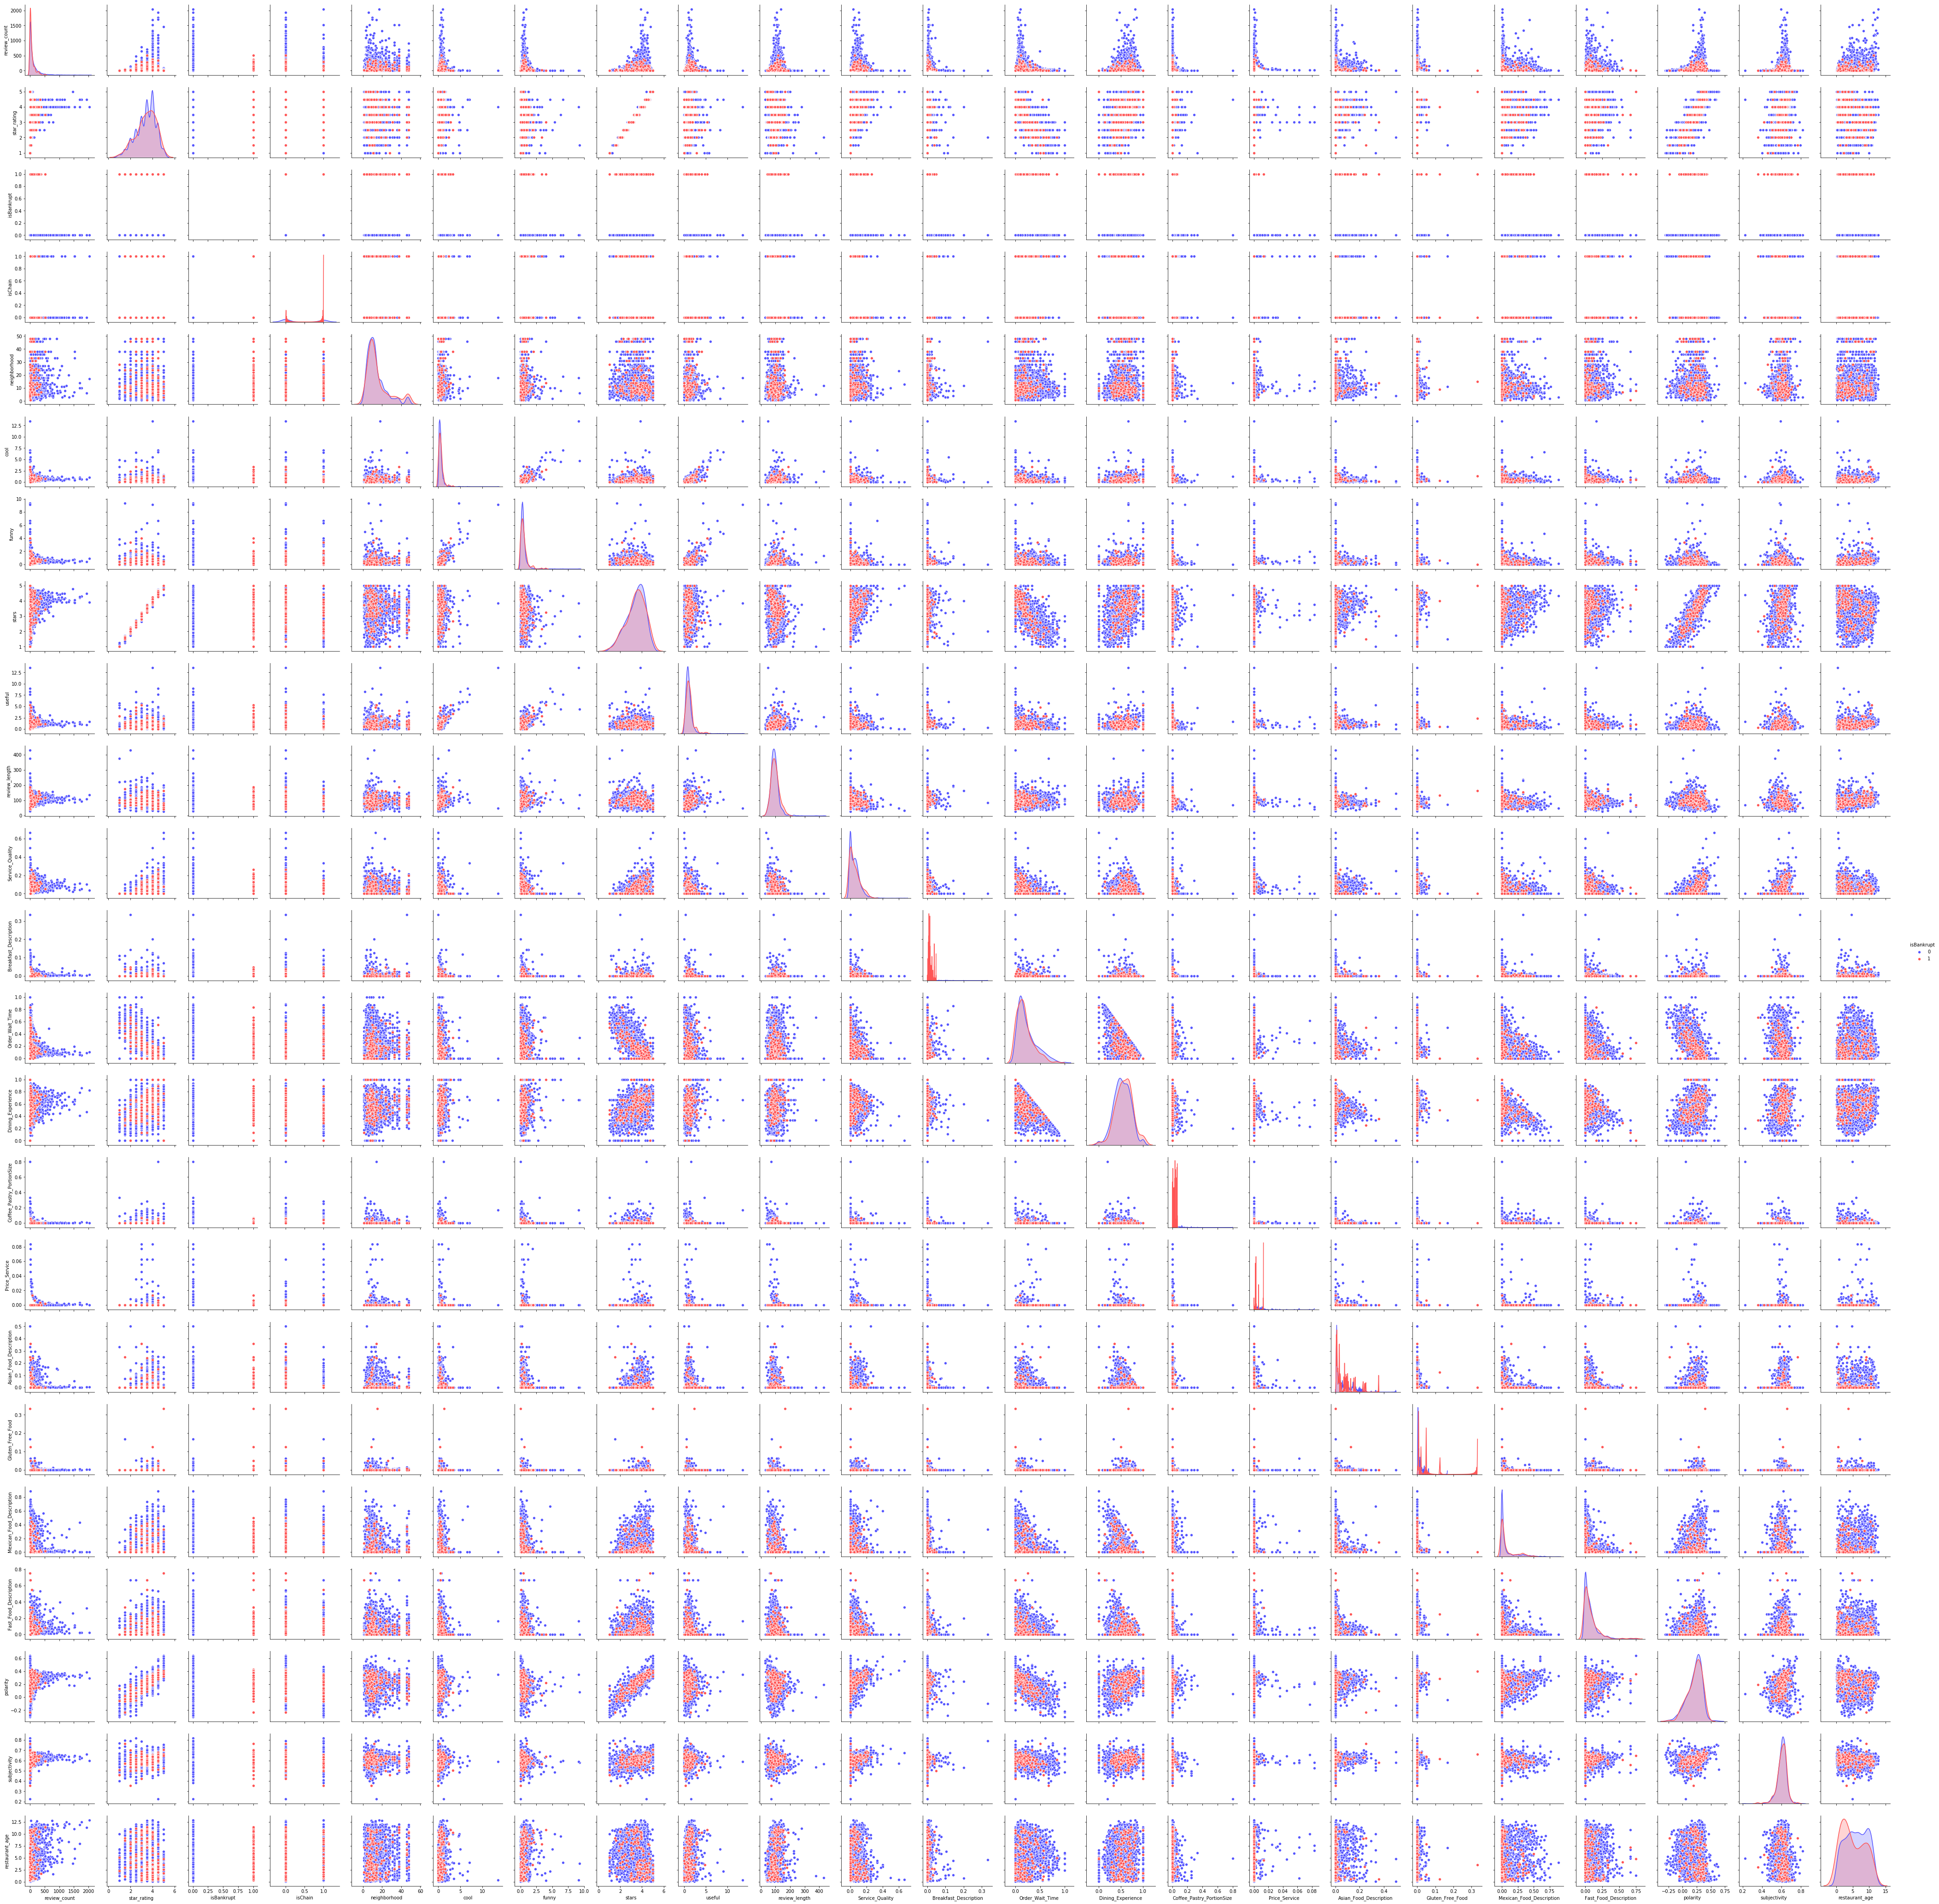

In [20]:
sns.pairplot(df, hue = 'isBankrupt',palette='seismic');

Some observations: <br>
- Many open restaurants have high values in `review_count`. <br>
- `star_rating` has postive relationships with `Service_Quality` and `polarity` and negative relationship with `Order_Wait_Time`. <br>
- There are special shapes in `neighborhood`.
- `cool` has positive relationships with `funny` and `useful`.<br>
- `stars` has positive relationship with `polaity` and negative relationship with `Order_Wait_Time`.<br>
- `Order_Wait_Time` has negative relationship with `polaity`.
- `Dining_Experience` has negative relationship with `polarity`.

## Correlation Matrix

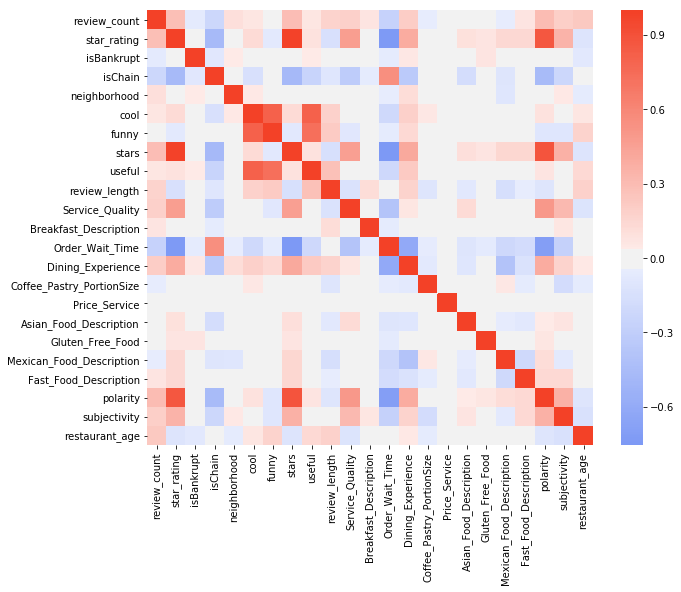

In [40]:
plt.figure(figsize=(10,8))
color_palette = sns.diverging_palette(260, 15, s=90, l=55, as_cmap = True)
sns.heatmap(df.corr(), cmap=color_palette,center=0);

Some observations: <br>
- `isBankrupt` has positive relationships with `neighborhood`, `useful`, `Dining_Experience` and `Gluten_Free_Food` and negative relationships with `review_count`, `isChain`, `Order_Wait_Time` and `restaurant_age`.<br>
- Other useful strong positive relationship: `star_rating` and `polarity`; `cool` and `funny`; `cool` and `useful`; `funny` and `useful`. <br>
- Other useful strong negative relationship: `star_rating` and `Order_Wait_Time`.

## Cluster Map

<Figure size 720x576 with 0 Axes>

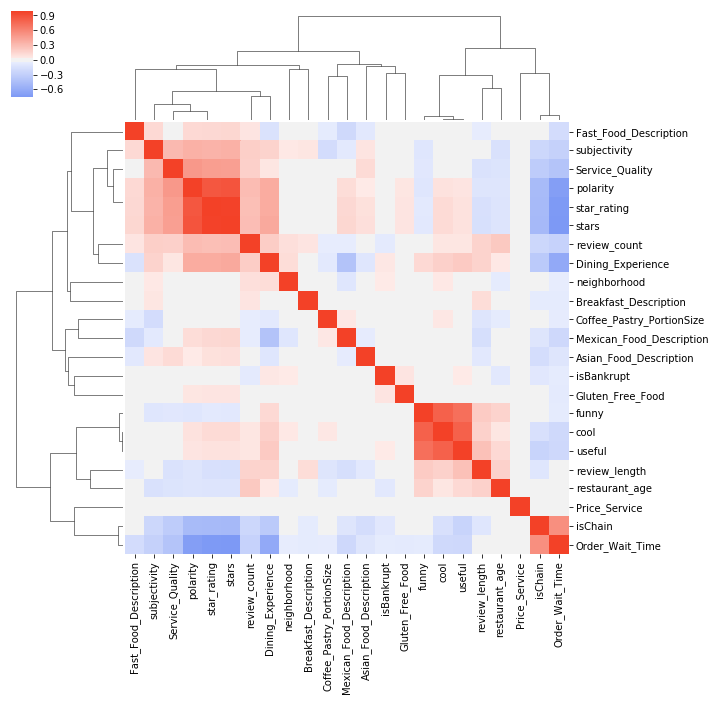

In [41]:
plt.figure(figsize=(10,8))
color_palette = sns.diverging_palette(260, 15, s=90, l=55, as_cmap = True)
sns.clustermap(df.corr(), method='complete', metric='correlation',cmap=color_palette, center=0);

## Neighborhood

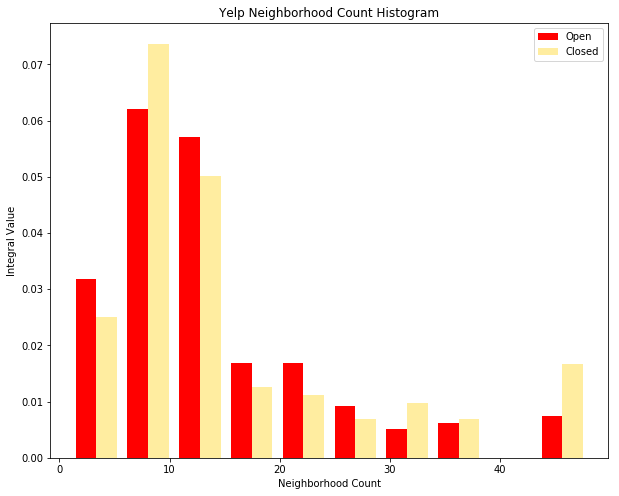

In [49]:
plt.figure(figsize=(10,8))
plt.hist([df['neighborhood'][df['isBankrupt']==0],\
          df['neighborhood'][df['isBankrupt']==1]],\
         label=['Open','Closed'], color=['red','#ffeda0'],density=True)
plt.legend()
plt.title('Yelp Neighborhood Count Histogram')
plt.xlabel('Neighborhood Count')
plt.ylabel('Integral Value');

Bankrupt Restaurants have high concentration in having 5 to 10 neighborhoods and above 40 neighborhoods.

## Useful

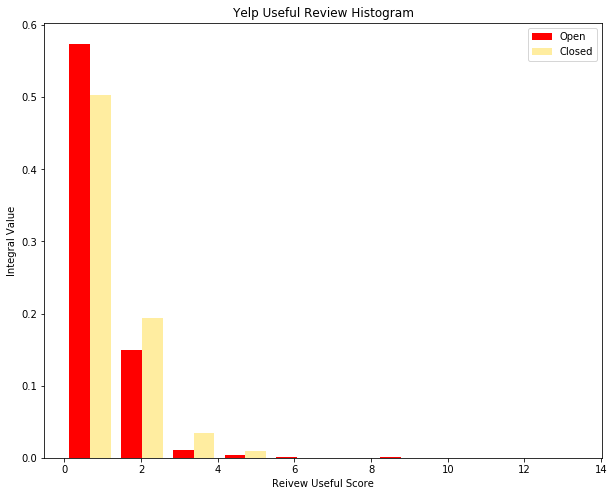

In [47]:
plt.figure(figsize=(10,8))
plt.hist([df['useful'][df['isBankrupt']==0],\
          df['useful'][df['isBankrupt']==1]],\
         label=['Open','Closed'], color=['red','#ffeda0'],density=True)
plt.legend()
plt.title('Yelp Useful Review Histogram')
plt.xlabel('Reivew Useful Score')
plt.ylabel('Integral Value');

The review for bankrupt restaurants are relatively more useful.

## Dining Experience

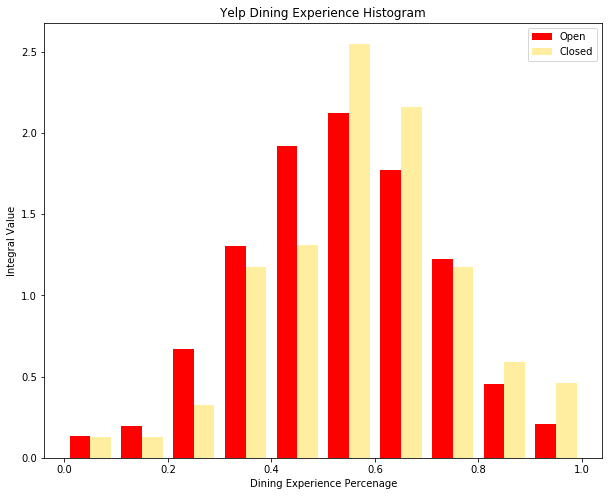

In [50]:
# review_count histgram
plt.figure(figsize=(10,8))
plt.hist([df['Dining_Experience'][df['isBankrupt']==0].dropna(),\
          df['Dining_Experience'][df['isBankrupt']==1].dropna()],\
         label=['Open','Closed'], color=['red','#ffeda0'],density=True)
plt.legend()
plt.title('Yelp Dining Experience Histogram')
plt.xlabel('Dining Experience Percenage')
plt.ylabel('Integral Value');

Bankrupt restaurants are more likely to contain reviews about dining experience.

## Review Count

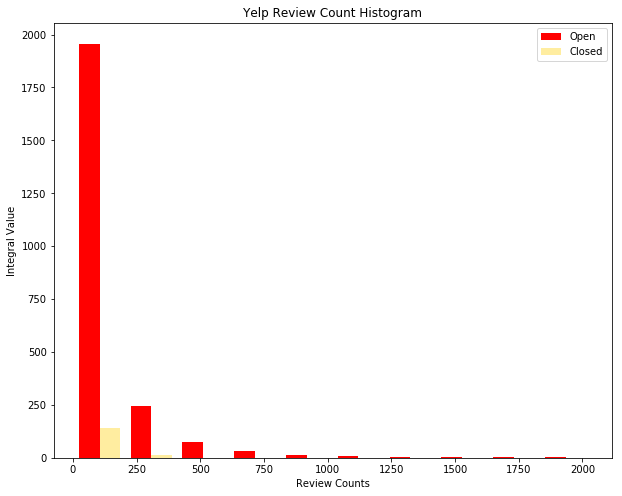

In [53]:
# review_count histgram
plt.figure(figsize=(10,8))
plt.hist([df['review_count'][df['isBankrupt']==0].dropna(),\
          df['review_count'][df['isBankrupt']==1].dropna()],\
         label=['Open','Closed'], color=['red','#ffeda0'])
plt.legend()
plt.title('Yelp Review Count Histogram')
plt.xlabel('Review Counts')
plt.ylabel('Integral Value');

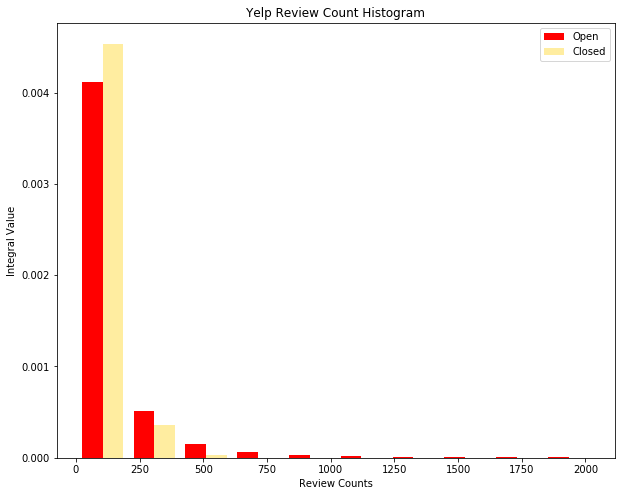

In [54]:
# integral review_count histgram
plt.figure(figsize=(10,8))
plt.hist([df['review_count'][df['isBankrupt']==0].dropna(),\
          df['review_count'][df['isBankrupt']==1].dropna()],\
         label=['Open','Closed'], color=['red','#ffeda0'], density=True)
plt.legend()
plt.title('Yelp Review Count Histogram')
plt.xlabel('Review Counts')
plt.ylabel('Integral Value');

Compared to non-bankrupt restaurants, more percentage of bankrupt restaurants have 0 to 250 reviews.

## isChain

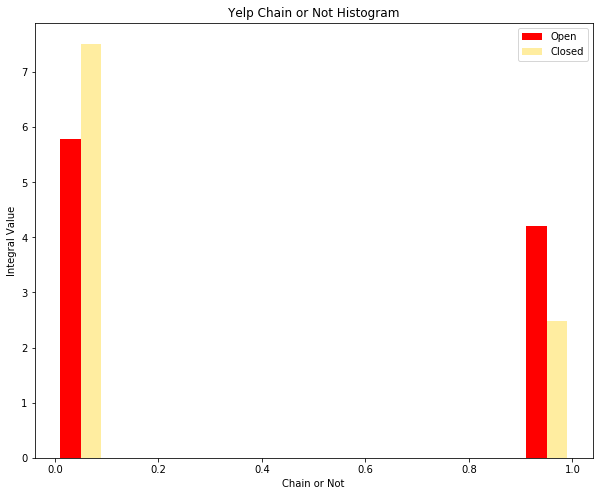

In [55]:
plt.figure(figsize=(10,8))
plt.hist([df['isChain'][df['isBankrupt']==0],\
          df['isChain'][df['isBankrupt']==1]],\
         label=['Open','Closed'], color=['red','#ffeda0'],density=True)
plt.legend()
plt.title('Yelp Chain or Not Histogram')
plt.xlabel('Chain or Not')
plt.ylabel('Integral Value');

Chain restaurants are less likely to be bankrupt.

## Order Wait Time

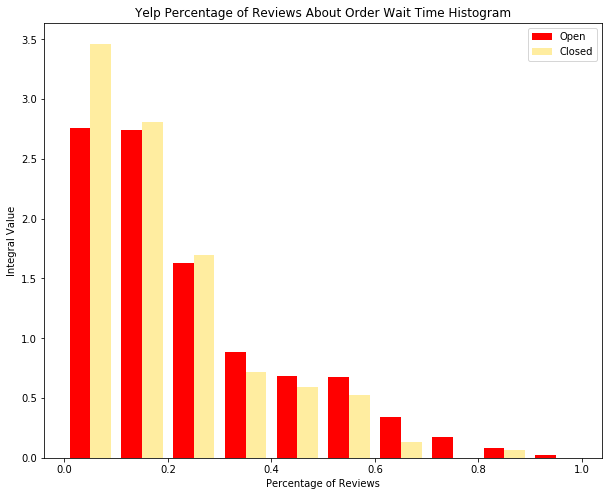

In [58]:
plt.figure(figsize=(10,8))
plt.hist([df['Order_Wait_Time'][df['isBankrupt']==0],\
          df['Order_Wait_Time'][df['isBankrupt']==1]],\
         label=['Open','Closed'], color=['red','#ffeda0'],density=True)
plt.legend()
plt.title('Yelp Percentage of Reviews About Order Wait Time Histogram')
plt.xlabel('Percentage of Reviews')
plt.ylabel('Integral Value');

Restaurants with low percentage of reviews about order waiting time are more likely to be bankrupt.

## Restaurant Age

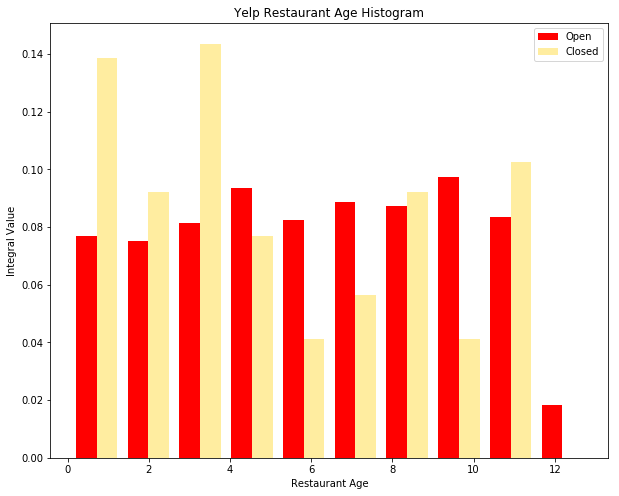

In [59]:
plt.figure(figsize=(10,8))
plt.hist([df['restaurant_age'][df['isBankrupt']==0],\
          df['restaurant_age'][df['isBankrupt']==1]],\
         label=['Open','Closed'], color=['red','#ffeda0'],density=True)
plt.legend()
plt.title('Yelp Restaurant Age Histogram')
plt.xlabel('Restaurant Age')
plt.ylabel('Integral Value');

Restaurants are more likely to be bankrupt in the first few years after opening; Besides, it would also be hard for restaurants to be open over 10 years.